# Sleep Disorder Prediction Model

## Project Objective

The goal here is to build a machine learning model that can predict if someone might have a sleep disorder, just based on their daily habits and health info. We’re using the Sleep Health and Lifestyle Dataset from Kaggle to do this.

What we will do:

1. **Analyze sleep patterns and lifestyle factors** that contribute to sleep disorders
2. **Build and compare multiple ML models** (Logistic Regression, Random Forest, XGBoost)
3. **Evaluate model performance** using comprehensive metrics
4. **Deploy the best model** for real-time predictions

### Target Sleep Disorders:
- **None**: Healthy sleep patterns
- **Sleep Apnea**: Breathing interruptions during sleep
- **Insomnia**: Difficulty falling or staying asleep

## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score
import xgboost as xgb

import pickle

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset loaded successfully!
Shape: (374, 13)
Columns: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']


## 2. Data Cleaning & Preprocessing

In [3]:
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData Types:")
print(df.dtypes)
print(f"\nFirst 5 rows:")
df.head()

=== DATASET OVERVIEW ===
Shape: (374, 13)

Columns: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']

Data Types:
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

First 5 rows:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
print("=== MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

print(f"\n=== DUPLICATES ===")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

=== MISSING VALUES ===
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Total missing values: 219

=== DUPLICATES ===
Number of duplicate rows: 0


In [5]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
print("Column names cleaned")
print(f"New columns: {list(df.columns)}")

print("\n=== BASIC STATISTICS ===")
df.describe()

Column names cleaned
New columns: ['person_id', 'gender', 'age', 'occupation', 'sleep_duration', 'quality_of_sleep', 'physical_activity_level', 'stress_level', 'bmi_category', 'blood_pressure', 'heart_rate', 'daily_steps', 'sleep_disorder']

=== BASIC STATISTICS ===


,person_id,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,heart_rate,daily_steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
print("=== TARGET VARIABLE ANALYSIS ===")
target_col = 'sleep_disorder'
print(f"Target variable: {target_col}")
print(f"\nValue counts:")
print(df[target_col].value_counts())
print(f"\nPercentage distribution:")
print(df[target_col].value_counts(normalize=True) * 100)

if df[target_col].isnull().sum() > 0:
    print(f"\nFound {df[target_col].isnull().sum()} missing values in target variable")
    df = df.dropna(subset=[target_col])
    print(f"Dropped rows with missing target values. New shape: {df.shape}")

=== TARGET VARIABLE ANALYSIS ===
Target variable: sleep_disorder

Value counts:
sleep_disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

Percentage distribution:
sleep_disorder
Sleep Apnea    50.322581
Insomnia       49.677419
Name: proportion, dtype: float64

Found 219 missing values in target variable
Dropped rows with missing target values. New shape: (155, 13)


In [7]:
if 'blood_pressure' in df.columns:
    print("=== PROCESSING BLOOD PRESSURE ===")
    # Split blood pressure into systolic and diastolic
    bp_split = df['blood_pressure'].str.split('/', expand=True)
    df['blood_pressure_systolic'] = pd.to_numeric(bp_split[0], errors='coerce')
    df['blood_pressure_diastolic'] = pd.to_numeric(bp_split[1], errors='coerce')
    
    df = df.drop('blood_pressure', axis=1)
    print("Blood pressure split into systolic and diastolic")
    print(f"Systolic range: {df['blood_pressure_systolic'].min()} - {df['blood_pressure_systolic'].max()}")
    print(f"Diastolic range: {df['blood_pressure_diastolic'].min()} - {df['blood_pressure_diastolic'].max()}")

print(f"\n=== FINAL DATASET INFO ===")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.info()

=== PROCESSING BLOOD PRESSURE ===
Blood pressure split into systolic and diastolic
Systolic range: 115 - 142
Diastolic range: 75 - 95

=== FINAL DATASET INFO ===
Shape: (155, 14)
Columns: ['person_id', 'gender', 'age', 'occupation', 'sleep_duration', 'quality_of_sleep', 'physical_activity_level', 'stress_level', 'bmi_category', 'heart_rate', 'daily_steps', 'sleep_disorder', 'blood_pressure_systolic', 'blood_pressure_diastolic']
<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 3 to 373
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   person_id                 155 non-null    int64  
 1   gender                    155 non-null    object 
 2   age                       155 non-null    int64  
 3   occupation                155 non-null    object 
 4   sleep_duration            155 non-null    float64
 5   quality_of_sleep          155 non-null    int64  
 6   physical_activity_level

## 3. Exploratory Data Analysis (EDA)

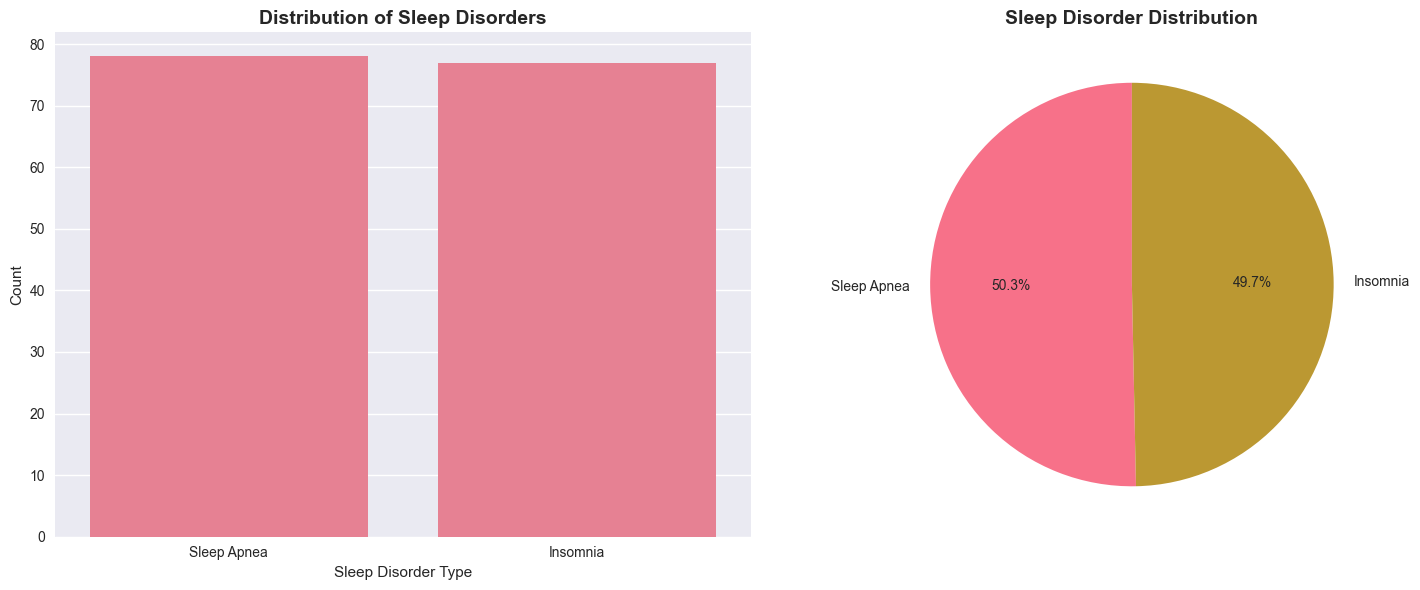

=== SLEEP DISORDER STATISTICS ===
Sleep Apnea: 78 cases (50.3%)
Insomnia: 77 cases (49.7%)


In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=df, x='sleep_disorder', ax=ax1)
ax1.set_title('Distribution of Sleep Disorders', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sleep Disorder Type')
ax1.set_ylabel('Count')

disorder_counts = df['sleep_disorder'].value_counts()
ax2.pie(disorder_counts.values, labels=disorder_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Sleep Disorder Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("=== SLEEP DISORDER STATISTICS ===")
for disorder in df['sleep_disorder'].unique():
    count = (df['sleep_disorder'] == disorder).sum()
    percentage = (count / len(df)) * 100
    print(f"{disorder}: {count} cases ({percentage:.1f}%)")

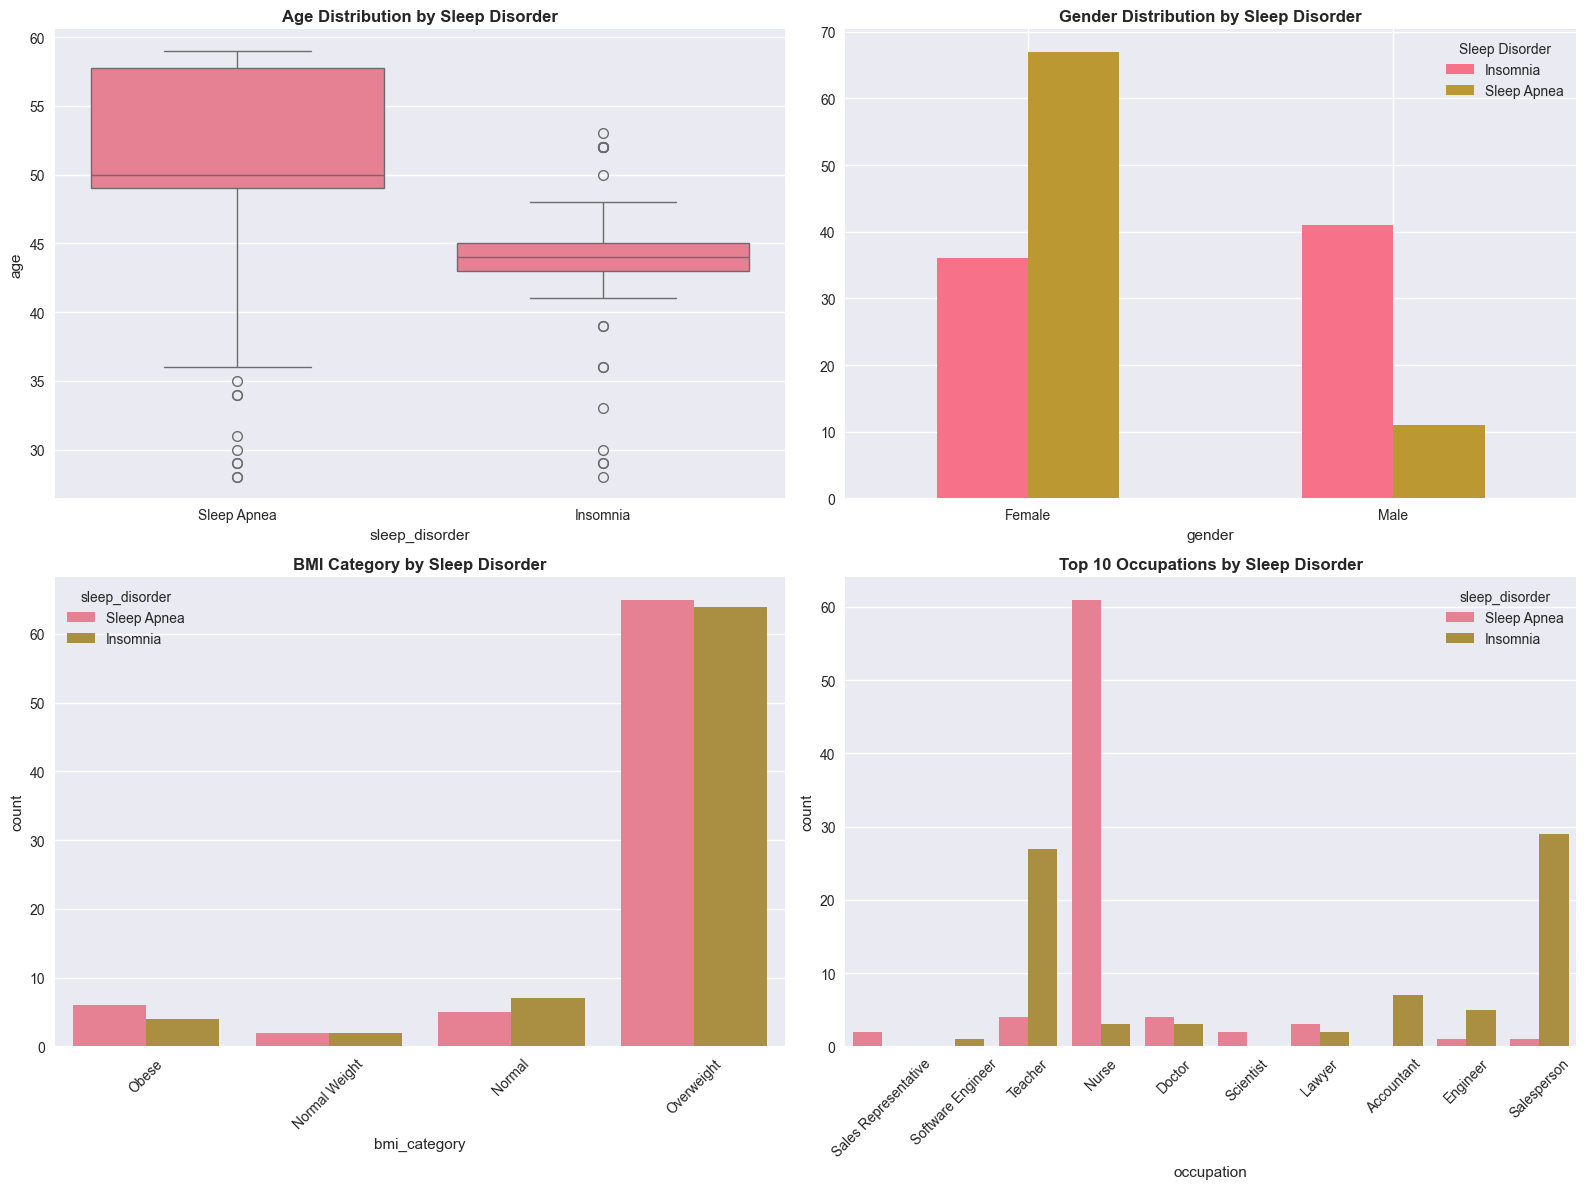

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.boxplot(data=df, x='sleep_disorder', y='age', ax=axes[0,0])
axes[0,0].set_title('Age Distribution by Sleep Disorder', fontweight='bold')

gender_disorder = pd.crosstab(df['gender'], df['sleep_disorder'])
gender_disorder.plot(kind='bar', ax=axes[0,1], rot=0)
axes[0,1].set_title('Gender Distribution by Sleep Disorder', fontweight='bold')
axes[0,1].legend(title='Sleep Disorder')

sns.countplot(data=df, x='bmi_category', hue='sleep_disorder', ax=axes[1,0])
axes[1,0].set_title('BMI Category by Sleep Disorder', fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)

top_occupations = df['occupation'].value_counts().head(10)
occupation_disorder = df[df['occupation'].isin(top_occupations.index)]
sns.countplot(data=occupation_disorder, x='occupation', hue='sleep_disorder', ax=axes[1,1])
axes[1,1].set_title('Top 10 Occupations by Sleep Disorder', fontweight='bold')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

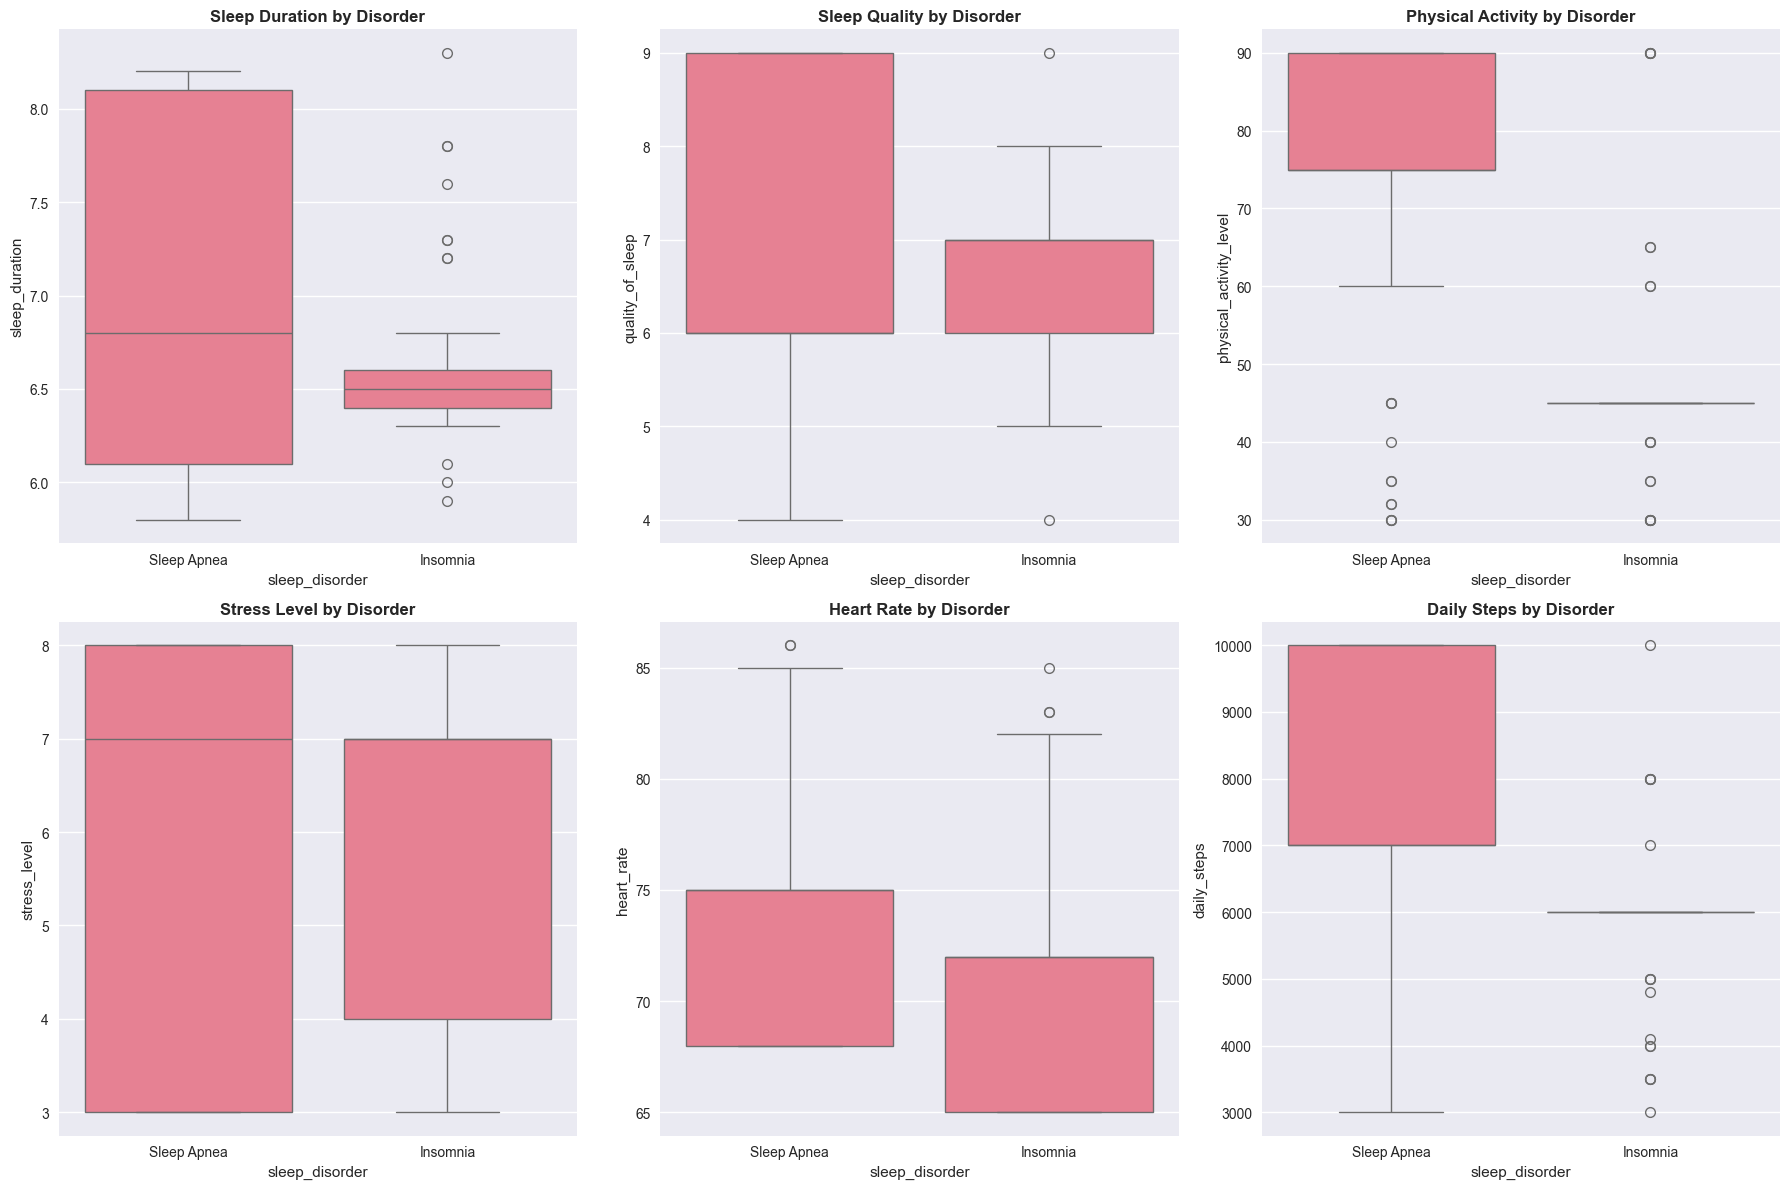

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.boxplot(data=df, x='sleep_disorder', y='sleep_duration', ax=axes[0,0])
axes[0,0].set_title('Sleep Duration by Disorder', fontweight='bold')

sns.boxplot(data=df, x='sleep_disorder', y='quality_of_sleep', ax=axes[0,1])
axes[0,1].set_title('Sleep Quality by Disorder', fontweight='bold')

sns.boxplot(data=df, x='sleep_disorder', y='physical_activity_level', ax=axes[0,2])
axes[0,2].set_title('Physical Activity by Disorder', fontweight='bold')

sns.boxplot(data=df, x='sleep_disorder', y='stress_level', ax=axes[1,0])
axes[1,0].set_title('Stress Level by Disorder', fontweight='bold')

sns.boxplot(data=df, x='sleep_disorder', y='heart_rate', ax=axes[1,1])
axes[1,1].set_title('Heart Rate by Disorder', fontweight='bold')

sns.boxplot(data=df, x='sleep_disorder', y='daily_steps', ax=axes[1,2])
axes[1,2].set_title('Daily Steps by Disorder', fontweight='bold')

plt.tight_layout()
plt.show()

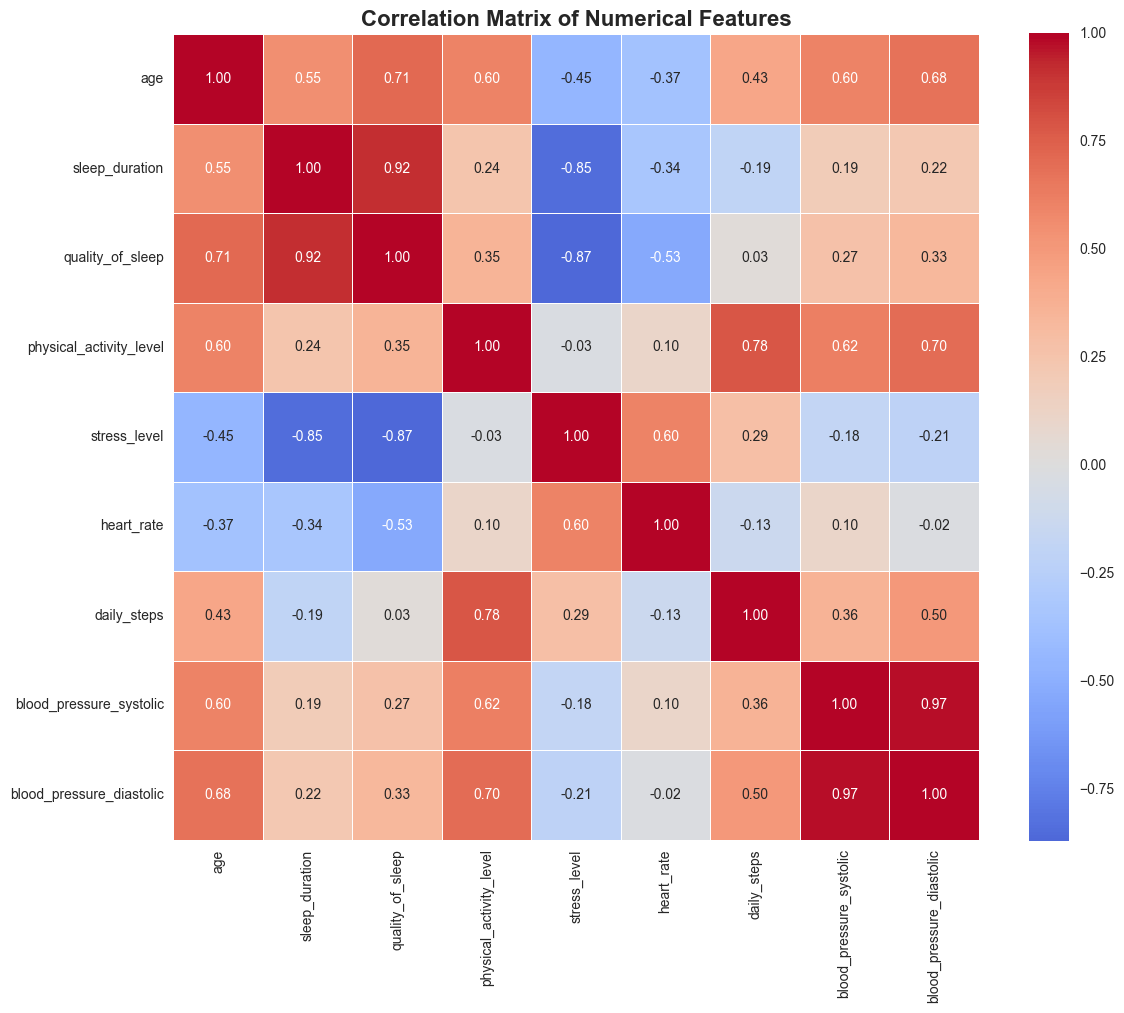

=== STRONG CORRELATIONS (|r| > 0.5) ===
age vs sleep_duration: 0.550
age vs quality_of_sleep: 0.710
age vs physical_activity_level: 0.605
age vs blood_pressure_systolic: 0.598
age vs blood_pressure_diastolic: 0.676
sleep_duration vs quality_of_sleep: 0.917
sleep_duration vs stress_level: -0.849
quality_of_sleep vs stress_level: -0.872
quality_of_sleep vs heart_rate: -0.535
physical_activity_level vs daily_steps: 0.781
physical_activity_level vs blood_pressure_systolic: 0.617
physical_activity_level vs blood_pressure_diastolic: 0.700
stress_level vs heart_rate: 0.599
blood_pressure_systolic vs blood_pressure_diastolic: 0.971


In [11]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'person_id' in numerical_cols:
    numerical_cols.remove('person_id')

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("=== STRONG CORRELATIONS (|r| > 0.5) ===")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {corr_val:.3f}")

## 4. Feature Engineering

In [12]:
print("=== FEATURE ENGINEERING ===")

df_features = df.copy()

bmi_mapping = {'Underweight': 1, 'Normal': 2, 'Overweight': 3, 'Obese': 4}
df_features['bmi_numeric'] = df_features['bmi_category'].map(bmi_mapping)
print("Created BMI numeric feature")

df_features['sleep_efficiency'] = df_features['quality_of_sleep'] / df_features['sleep_duration']
print("Created sleep efficiency feature")

df_features['daily_steps_safe'] = df_features['daily_steps'].replace(0, 1)
df_features['activity_steps_ratio'] = df_features['physical_activity_level'] / (df_features['daily_steps_safe'] / 1000)
# Handle any remaining infinite or NaN values
df_features['activity_steps_ratio'] = df_features['activity_steps_ratio'].replace([np.inf, -np.inf], np.nan)
df_features['activity_steps_ratio'] = df_features['activity_steps_ratio'].fillna(df_features['activity_steps_ratio'].median())
print("Created activity-steps ratio feature (fixed)")

def categorize_bp(systolic, diastolic):
    # Handle missing values
    if pd.isna(systolic) or pd.isna(diastolic):
        return 'Unknown'
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif systolic < 130 and diastolic < 80:
        return 'Elevated'
    elif systolic < 140 or diastolic < 90:
        return 'Stage 1'
    else:
        return 'Stage 2'

df_features['bp_category'] = df_features.apply(lambda row: categorize_bp(
    row['blood_pressure_systolic'], row['blood_pressure_diastolic']), axis=1)
print("Created blood pressure category feature (fixed)")

def categorize_age(age):
    if age < 30:
        return 'Young'
    elif age < 50:
        return 'Middle'
    else:
        return 'Senior'

df_features['age_group'] = df_features['age'].apply(categorize_age)
print("Created age group feature")

def categorize_sleep_quality(quality):
    if quality <= 4:
        return 'Poor'
    elif quality <= 7:
        return 'Fair'
    else:
        return 'Good'

df_features['sleep_quality_category'] = df_features['quality_of_sleep'].apply(categorize_sleep_quality)
print("Created sleep quality category feature")

print(f"\nChecking for missing values after feature engineering:")
missing_after = df_features.isnull().sum()
print(missing_after[missing_after > 0])

for col in df_features.columns:
    if df_features[col].dtype in ['float64', 'int64']:
        df_features[col] = df_features[col].fillna(df_features[col].median())
    else:
        df_features[col] = df_features[col].fillna(df_features[col].mode()[0] if len(df_features[col].mode()) > 0 else 'Unknown')

print(f"\nFinal check - Missing values: {df_features.isnull().sum().sum()}")
print(f"New features created: {len(df_features.columns) - len(df.columns)}")
print(f"Total features: {len(df_features.columns)}")

=== FEATURE ENGINEERING ===
Created BMI numeric feature
Created sleep efficiency feature
Created activity-steps ratio feature (fixed)
Created blood pressure category feature (fixed)
Created age group feature
Created sleep quality category feature

Checking for missing values after feature engineering:
bmi_numeric    4
dtype: int64

Final check - Missing values: 0
New features created: 7
Total features: 21


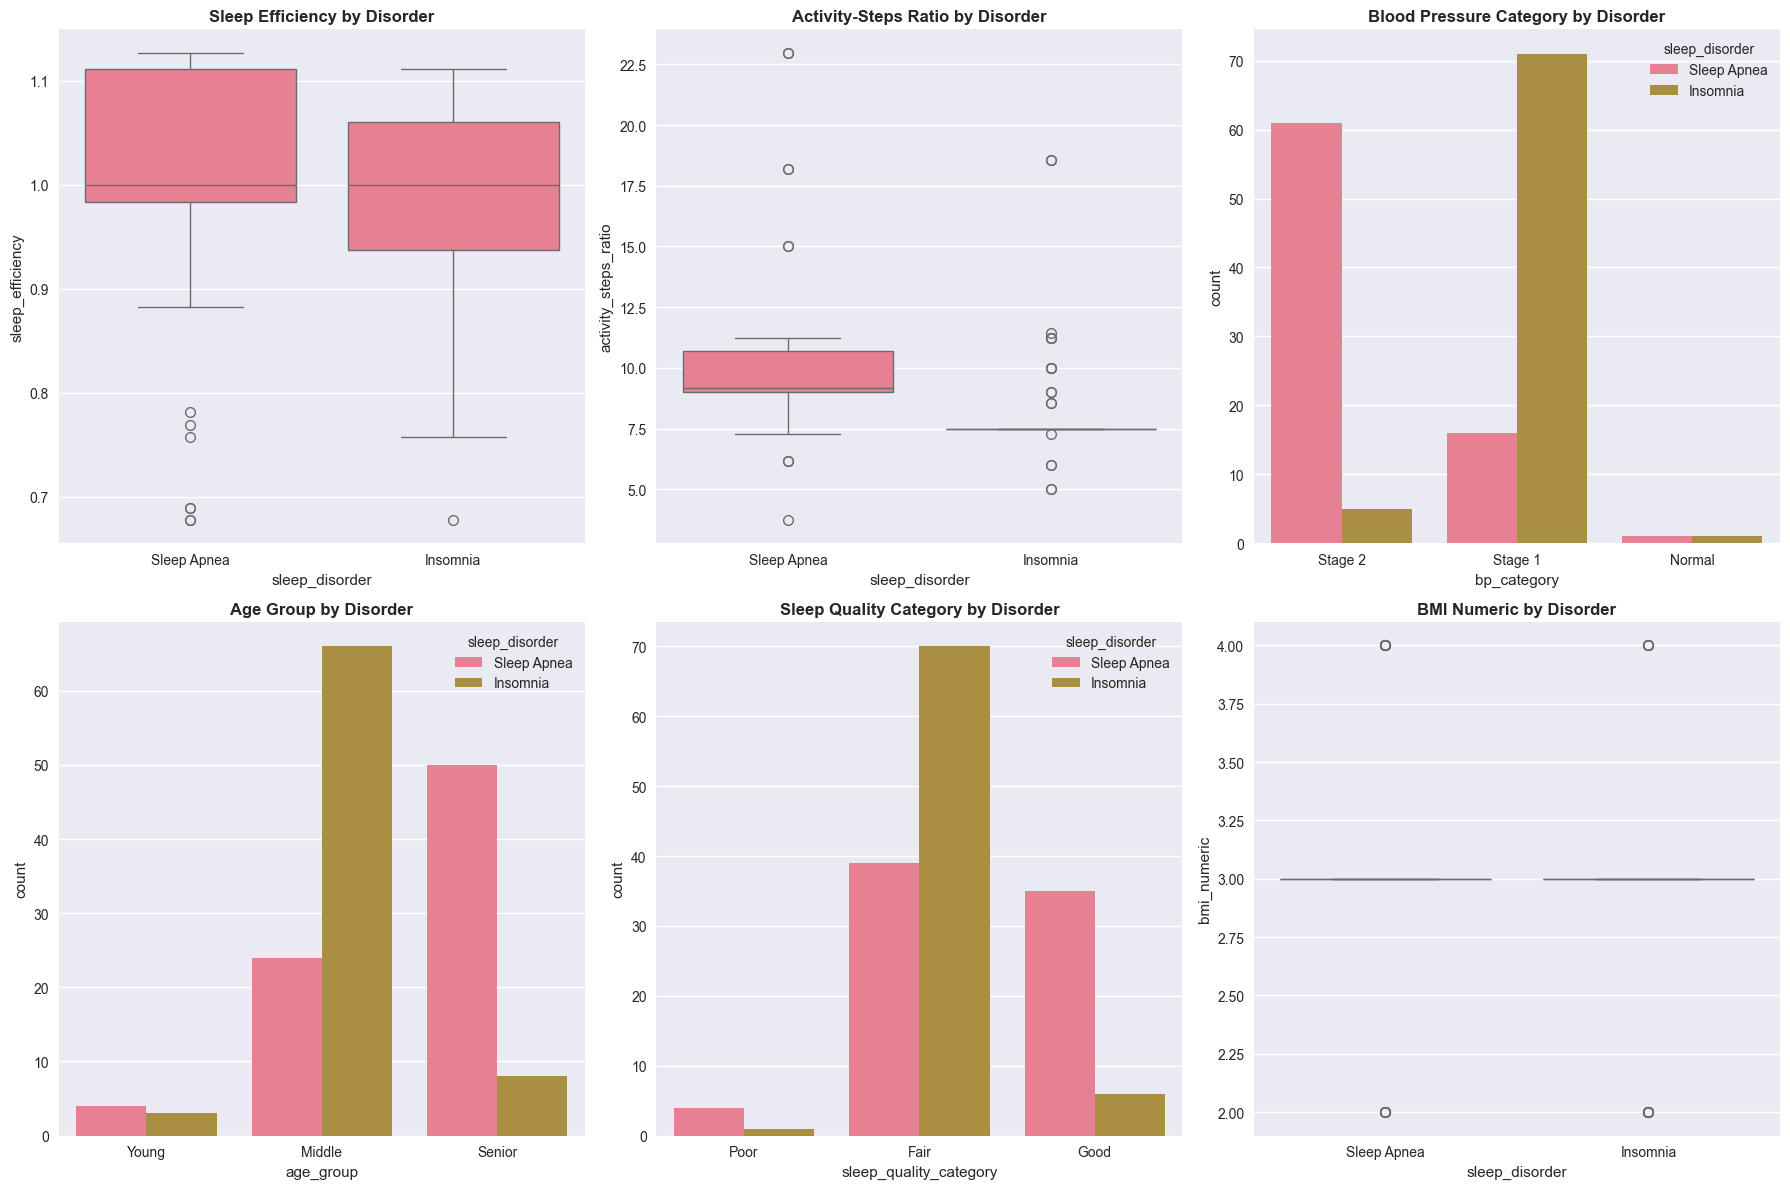

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.boxplot(data=df_features, x='sleep_disorder', y='sleep_efficiency', ax=axes[0,0])
axes[0,0].set_title('Sleep Efficiency by Disorder', fontweight='bold')

sns.boxplot(data=df_features, x='sleep_disorder', y='activity_steps_ratio', ax=axes[0,1])
axes[0,1].set_title('Activity-Steps Ratio by Disorder', fontweight='bold')

sns.countplot(data=df_features, x='bp_category', hue='sleep_disorder', ax=axes[0,2])
axes[0,2].set_title('Blood Pressure Category by Disorder', fontweight='bold')

sns.countplot(data=df_features, x='age_group', hue='sleep_disorder', ax=axes[1,0])
axes[1,0].set_title('Age Group by Disorder', fontweight='bold')

sns.countplot(data=df_features, x='sleep_quality_category', hue='sleep_disorder', ax=axes[1,1])
axes[1,1].set_title('Sleep Quality Category by Disorder', fontweight='bold')

sns.boxplot(data=df_features, x='sleep_disorder', y='bmi_numeric', ax=axes[1,2])
axes[1,2].set_title('BMI Numeric by Disorder', fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Model Training & Comparison

In [14]:
print("=== PREPARING DATA FOR MODELING ===")

feature_columns = [
    'gender', 'age', 'occupation', 'sleep_duration', 'quality_of_sleep',
    'physical_activity_level', 'stress_level', 'bmi_category',
    'blood_pressure_systolic', 'blood_pressure_diastolic', 'heart_rate', 'daily_steps',
    'bmi_numeric', 'sleep_efficiency', 'activity_steps_ratio', 'bp_category', 'age_group'
]

X = df_features[feature_columns].copy()
y = df_features['sleep_disorder'].copy()

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Features: {feature_columns}")

categorical_columns = ['gender', 'occupation', 'bmi_category', 'bp_category', 'age_group']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    print(f"Encoded {col}: {len(le.classes_)} categories")

target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)
print(f"Encoded target variable: {target_encoder.classes_}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled")

=== PREPARING DATA FOR MODELING ===
Feature matrix shape: (155, 17)
Target vector shape: (155,)
Features: ['gender', 'age', 'occupation', 'sleep_duration', 'quality_of_sleep', 'physical_activity_level', 'stress_level', 'bmi_category', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'heart_rate', 'daily_steps', 'bmi_numeric', 'sleep_efficiency', 'activity_steps_ratio', 'bp_category', 'age_group']
Encoded gender: 2 categories
Encoded occupation: 10 categories
Encoded bmi_category: 4 categories
Encoded bp_category: 3 categories
Encoded age_group: 3 categories
Encoded target variable: ['Insomnia' 'Sleep Apnea']

Training set: (124, 17)
Test set: (31, 17)
Features scaled


In [21]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')
}

model_results = {}

print("=== TRAINING MODELS ===")

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    if name == 'Logistic Regression':
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    else:
        X_train_model = X_train
        X_test_model = X_test
    
    model.fit(X_train_model, y_train)
    
    y_pred = model.predict(X_test_model)
    y_pred_proba = model.predict_proba(X_test_model)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    try:
        roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
    except:
        roc_auc = 0.0
    
    cv_scores = cross_val_score(model, X_train_model, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"{name} completed")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   F1-Score: {f1:.4f}")
    print(f"   ROC AUC: {roc_auc:.4f}")
    print(f"   CV Score: {cv_mean:.4f} (±{cv_std:.4f})")

print("\nAll models trained successfully!")

=== TRAINING MODELS ===

Training Logistic Regression...
Logistic Regression completed
   Accuracy: 0.8710
   F1-Score: 0.8710
   ROC AUC: 0.0000
   CV Score: 0.8873 (±0.0685)

Training Random Forest...
Random Forest completed
   Accuracy: 0.9032
   F1-Score: 0.9032
   ROC AUC: 0.0000
   CV Score: 0.8307 (±0.0155)

Training XGBoost...
XGBoost completed
   Accuracy: 0.9032
   F1-Score: 0.9032
   ROC AUC: 0.0000
   CV Score: 0.8550 (±0.0313)

All models trained successfully!


## 6. Model Evaluation

In [16]:
comparison_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Accuracy': [results['accuracy'] for results in model_results.values()],
    'F1-Score': [results['f1_score'] for results in model_results.values()],
    'ROC AUC': [results['roc_auc'] for results in model_results.values()],
    'CV Mean': [results['cv_mean'] for results in model_results.values()],
    'CV Std': [results['cv_std'] for results in model_results.values()]
})

print("=== MODEL COMPARISON ===")
print(comparison_df.round(4))

best_model_name = comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Model']
best_model = model_results[best_model_name]['model']
print(f"\nBest Model: {best_model_name}")
print(f"Best Accuracy: {comparison_df['Accuracy'].max():.4f}")

=== MODEL COMPARISON ===
                 Model  Accuracy  F1-Score  ROC AUC  CV Mean  CV Std
0  Logistic Regression    0.8710    0.8710      0.0   0.8873  0.0685
1        Random Forest    0.9032    0.9032      0.0   0.8307  0.0155
2              XGBoost    0.9032    0.9032      0.0   0.8550  0.0313

Best Model: Random Forest
Best Accuracy: 0.9032


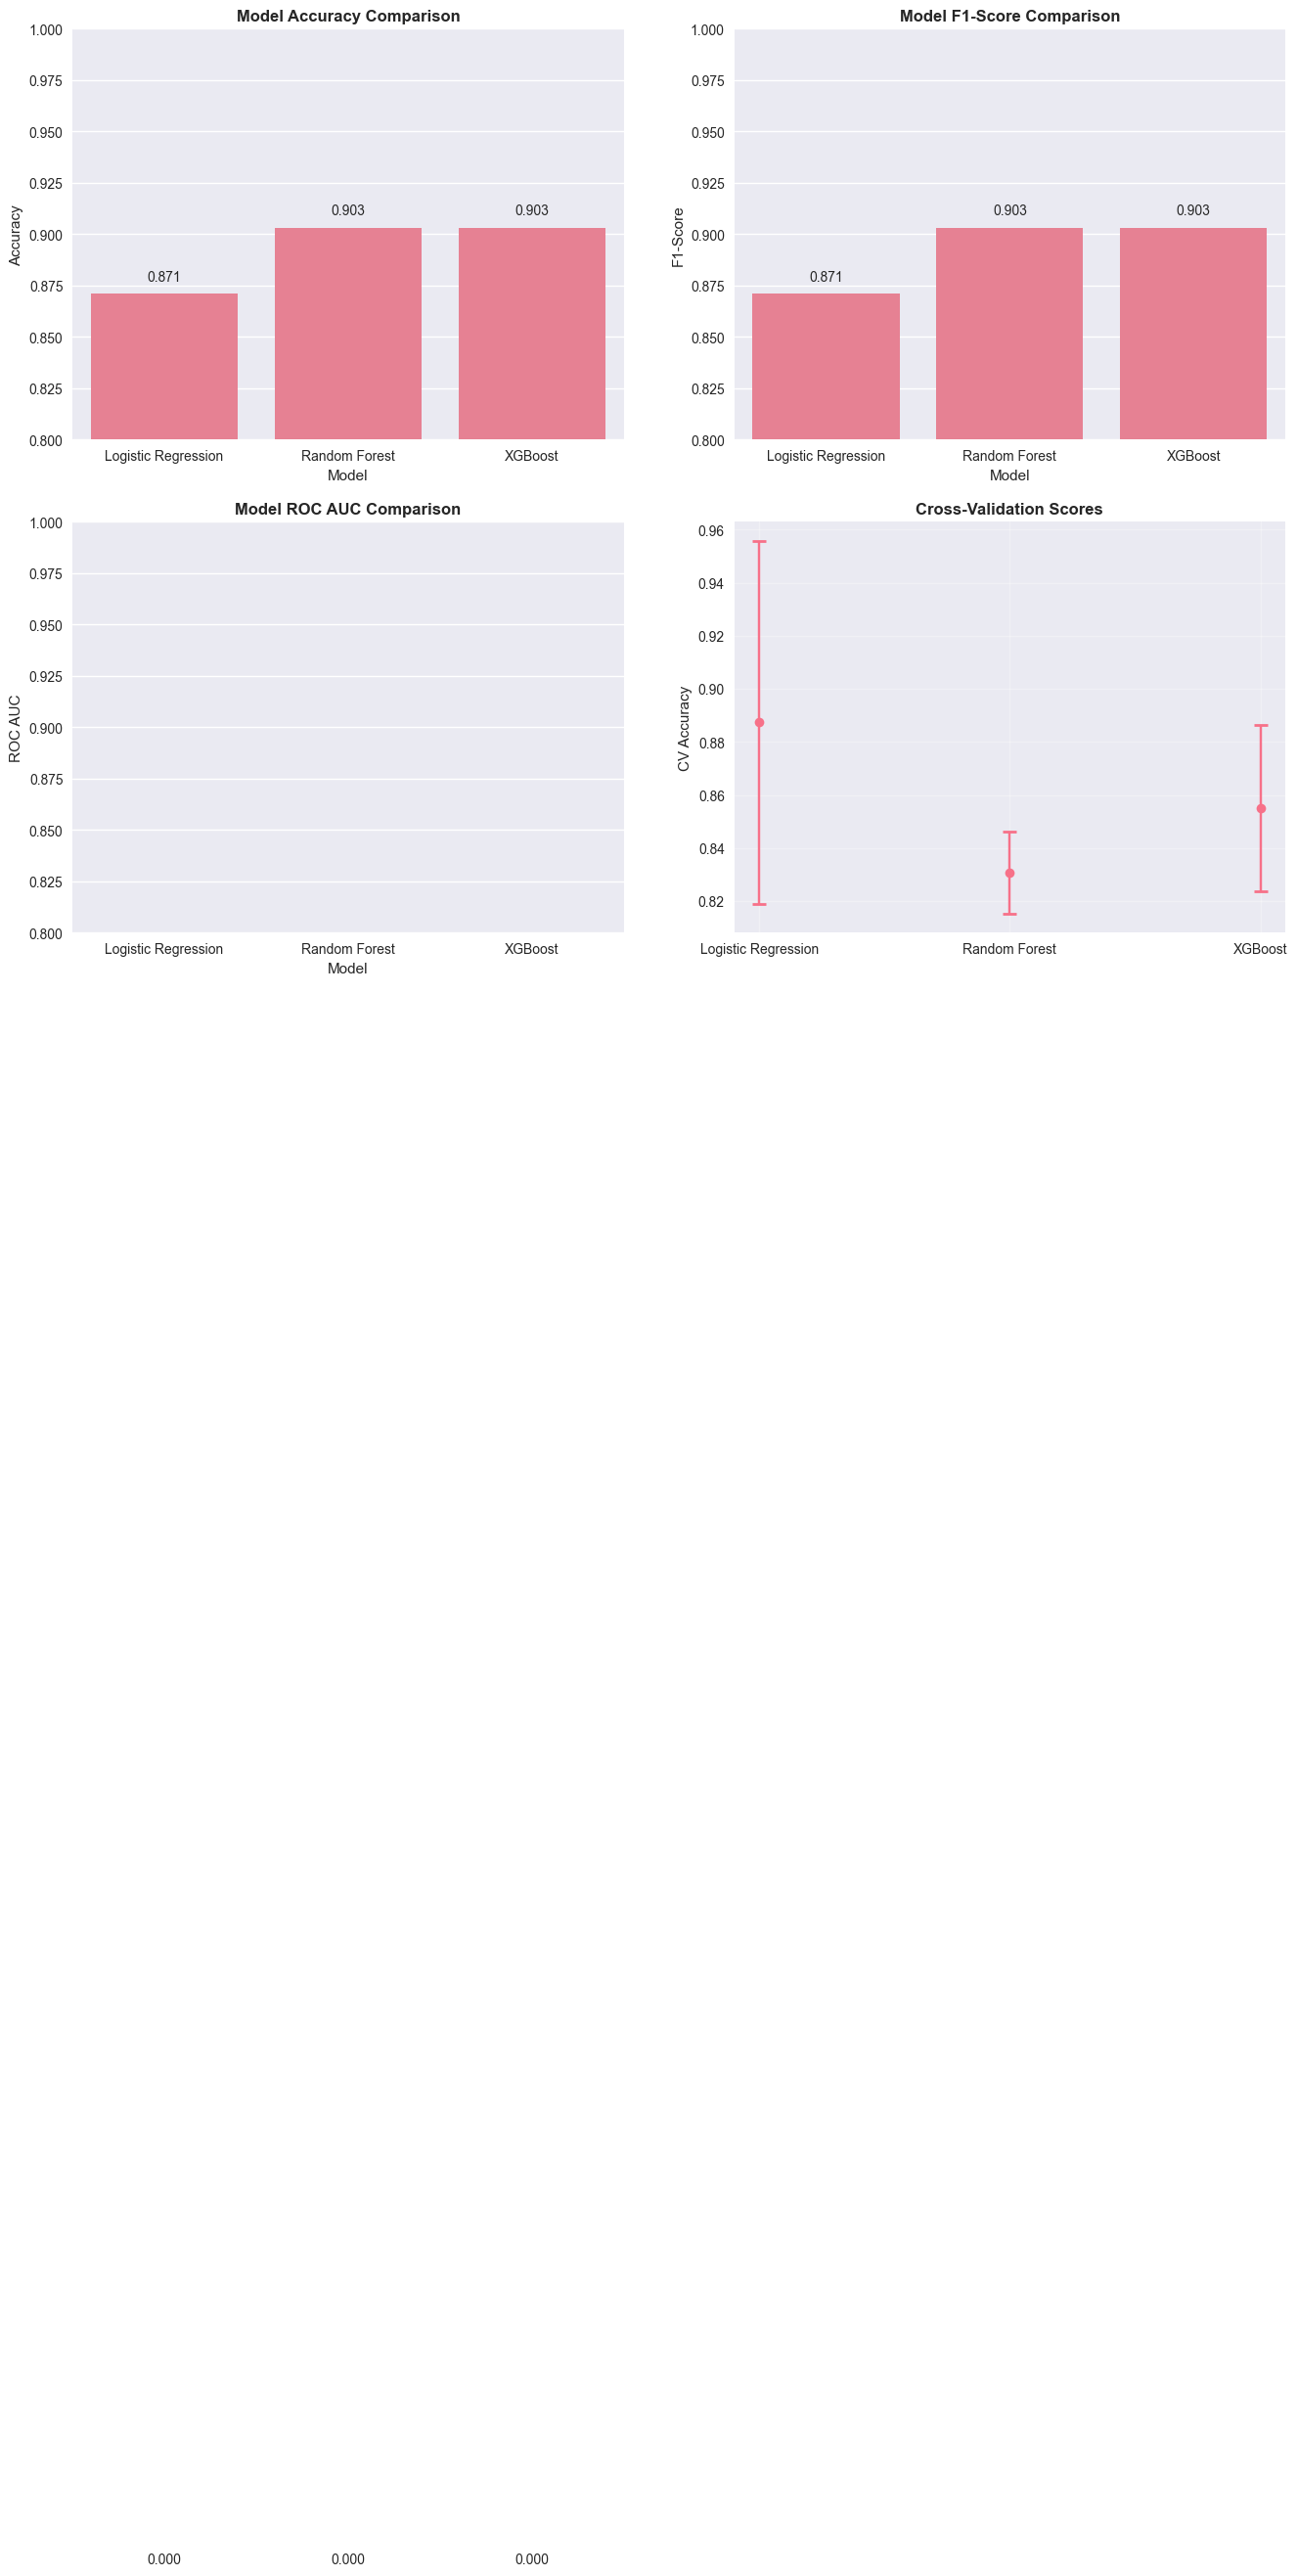

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.barplot(data=comparison_df, x='Model', y='Accuracy', ax=axes[0,0])
axes[0,0].set_title('Model Accuracy Comparison', fontweight='bold')
axes[0,0].set_ylim(0.8, 1.0)
for i, v in enumerate(comparison_df['Accuracy']):
    axes[0,0].text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom')

sns.barplot(data=comparison_df, x='Model', y='F1-Score', ax=axes[0,1])
axes[0,1].set_title('Model F1-Score Comparison', fontweight='bold')
axes[0,1].set_ylim(0.8, 1.0)
for i, v in enumerate(comparison_df['F1-Score']):
    axes[0,1].text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom')

sns.barplot(data=comparison_df, x='Model', y='ROC AUC', ax=axes[1,0])
axes[1,0].set_title('Model ROC AUC Comparison', fontweight='bold')
axes[1,0].set_ylim(0.8, 1.0)
for i, v in enumerate(comparison_df['ROC AUC']):
    axes[1,0].text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom')

axes[1,1].errorbar(range(len(comparison_df)), comparison_df['CV Mean'], 
                   yerr=comparison_df['CV Std'], fmt='o', capsize=5, capthick=2)
axes[1,1].set_xticks(range(len(comparison_df)))
axes[1,1].set_xticklabels(comparison_df['Model'])
axes[1,1].set_title('Cross-Validation Scores', fontweight='bold')
axes[1,1].set_ylabel('CV Accuracy')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== DETAILED EVALUATION: Random Forest ===

Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.88      0.93      0.90        15
 Sleep Apnea       0.93      0.88      0.90        16

    accuracy                           0.90        31
   macro avg       0.90      0.90      0.90        31
weighted avg       0.91      0.90      0.90        31



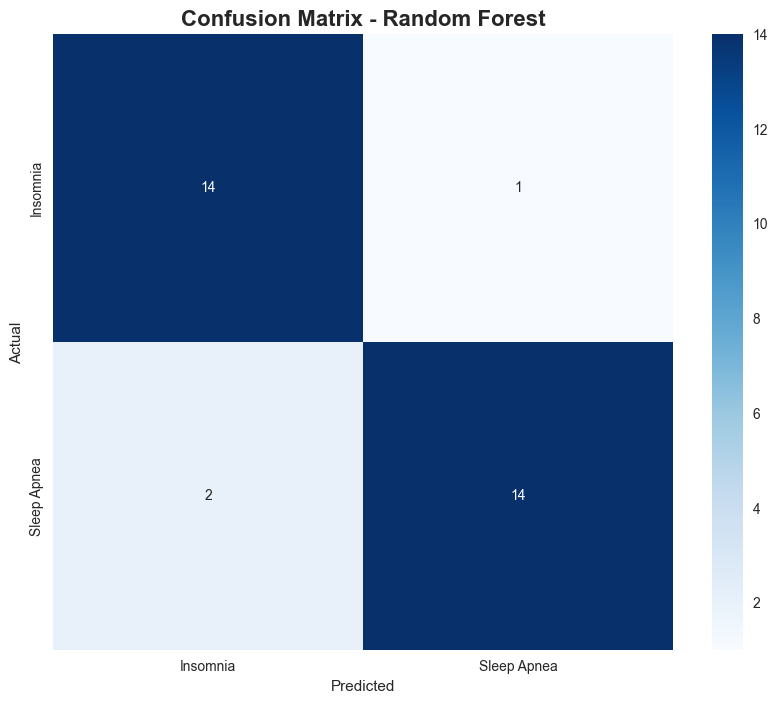

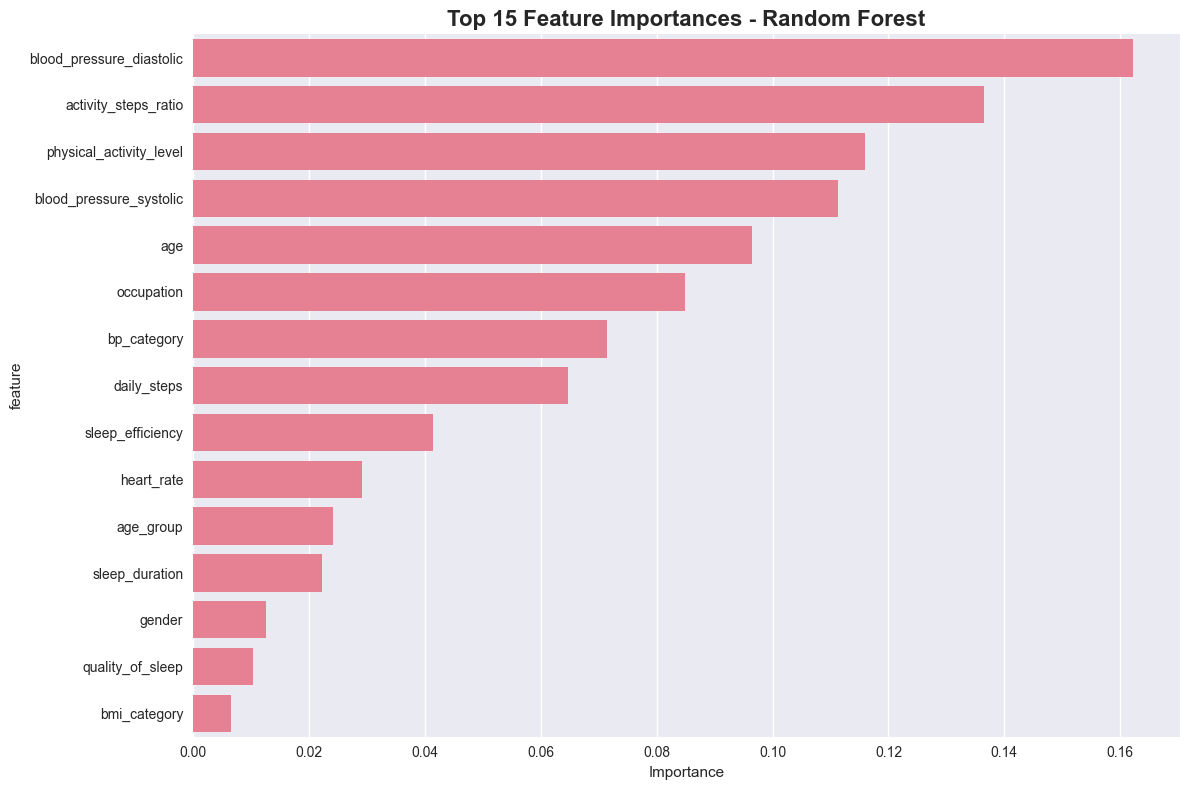


Top 10 Most Important Features:
 1. blood_pressure_diastolic  0.1622
 2. activity_steps_ratio      0.1365
 3. physical_activity_level   0.1159
 4. blood_pressure_systolic   0.1113
 5. age                       0.0964
 6. occupation                0.0849
 7. bp_category               0.0714
 8. daily_steps               0.0647
 9. sleep_efficiency          0.0414
10. heart_rate                0.0292


In [18]:
print(f"=== DETAILED EVALUATION: {best_model_name} ===")

best_results = model_results[best_model_name]
y_pred_best = best_results['y_pred']

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, 
                          target_names=target_encoder.classes_))

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
    plt.title(f'Top 15 Feature Importances - {best_model_name}', fontsize=16, fontweight='bold')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Most Important Features:")
    for i, (_, row) in enumerate(feature_importance.head(10).iterrows()):
        print(f"{i+1:2d}. {row['feature']:25s} {row['importance']:.4f}")

## 7. Export Trained Model

In [19]:
print("=== EXPORTING MODEL FOR DEPLOYMENT ===")

model_package = {
    'model': best_model,
    'model_name': best_model_name,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'target_encoder': target_encoder,
    'feature_columns': feature_columns,
    'model_performance': {
        'accuracy': best_results['accuracy'],
        'f1_score': best_results['f1_score'],
        'roc_auc': best_results['roc_auc'],
        'cv_mean': best_results['cv_mean'],
        'cv_std': best_results['cv_std']
    },
    'training_info': {
        'training_samples': len(X_train),
        'test_samples': len(X_test),
        'features_used': len(feature_columns),
        'target_classes': list(target_encoder.classes_)
    }
}

with open('model.pkl', 'wb') as f:
    pickle.dump(model_package, f)

print(f"Model saved as 'model.pkl'")
print(f"Model: {best_model_name}")
print(f"Accuracy: {best_results['accuracy']:.4f}")
print(f"F1-Score: {best_results['f1_score']:.4f}")
print(f"CV Score: {best_results['cv_mean']:.4f} (±{best_results['cv_std']:.4f})")

print("\nTesting model loading...")
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print(f"Model loaded successfully")
print(f"Model type: {type(loaded_model['model'])}")
print(f"Features: {len(loaded_model['feature_columns'])}")
print(f"Target classes: {loaded_model['target_encoder'].classes_}")

=== EXPORTING MODEL FOR DEPLOYMENT ===
Model saved as 'model.pkl'
Model: Random Forest
Accuracy: 0.9032
F1-Score: 0.9032
CV Score: 0.8307 (±0.0155)

Testing model loading...
Model loaded successfully
Model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Features: 17
Target classes: ['Insomnia' 'Sleep Apnea']


In [20]:
def predict_sleep_disorder(sample_data):
    """
    Predict sleep disorder for a sample input
    
    Args:
        sample_data (dict): Dictionary with feature values
    
    Returns:
        dict: Prediction results with probabilities
    """
    with open('model.pkl', 'rb') as f:
        model_pkg = pickle.load(f)
    
    sample_df = pd.DataFrame([sample_data])
    
    bmi_mapping = {'Underweight': 1, 'Normal': 2, 'Overweight': 3, 'Obese': 4}
    sample_df['bmi_numeric'] = sample_df['bmi_category'].map(bmi_mapping)
    sample_df['sleep_efficiency'] = sample_df['quality_of_sleep'] / sample_df['sleep_duration']
    sample_df['activity_steps_ratio'] = sample_df['physical_activity_level'] / (sample_df['daily_steps'] / 1000)
    
    def categorize_bp(systolic, diastolic):
        if systolic < 120 and diastolic < 80:
            return 'Normal'
        elif systolic < 130 and diastolic < 80:
            return 'Elevated'
        elif systolic < 140 or diastolic < 90:
            return 'Stage 1'
        else:
            return 'Stage 2'
    
    sample_df['bp_category'] = sample_df.apply(lambda row: categorize_bp(
        row['blood_pressure_systolic'], row['blood_pressure_diastolic']), axis=1)
    
    def categorize_age(age):
        if age < 30:
            return 'Young'
        elif age < 50:
            return 'Middle'
        else:
            return 'Senior'
    
    sample_df['age_group'] = sample_df['age'].apply(categorize_age)
    
    for col, encoder in model_pkg['label_encoders'].items():
        if col in sample_df.columns:
            sample_df[col] = sample_df[col].apply(
                lambda x: x if x in encoder.classes_ else encoder.classes_[0]
            )
            sample_df[col] = encoder.transform(sample_df[col])
    
    X_sample = sample_df[model_pkg['feature_columns']]
    
    if model_pkg['model_name'] == 'Logistic Regression':
        X_sample = model_pkg['scaler'].transform(X_sample)
    
    prediction = model_pkg['model'].predict(X_sample)[0]
    probabilities = model_pkg['model'].predict_proba(X_sample)[0]
    
    predicted_class = model_pkg['target_encoder'].inverse_transform([prediction])[0]
    
    prob_dict = {}
    for i, class_name in enumerate(model_pkg['target_encoder'].classes_):
        prob_dict[class_name] = probabilities[i]
    
    return {
        'prediction': predicted_class,
        'confidence': max(probabilities),
        'probabilities': prob_dict
    }

sample_input = {
    'gender': 'Male',
    'age': 35,
    'occupation': 'Software Engineer',
    'sleep_duration': 7.5,
    'quality_of_sleep': 8,
    'physical_activity_level': 60,
    'stress_level': 4,
    'bmi_category': 'Normal',
    'blood_pressure_systolic': 120,
    'blood_pressure_diastolic': 80,
    'heart_rate': 70,
    'daily_steps': 8000
}

print("\nTESTING PREDICTION FUNCTION")
print("Sample input:")
for key, value in sample_input.items():
    print(f"  {key}: {value}")

result = predict_sleep_disorder(sample_input)
print(f"\nPrediction Results:")
print(f"  Predicted disorder: {result['prediction']}")
print(f"  Confidence: {result['confidence']:.3f}")
print(f"  Probabilities:")
for disorder, prob in result['probabilities'].items():
    print(f"    {disorder}: {prob:.3f}")


TESTING PREDICTION FUNCTION
Sample input:
  gender: Male
  age: 35
  occupation: Software Engineer
  sleep_duration: 7.5
  quality_of_sleep: 8
  physical_activity_level: 60
  stress_level: 4
  bmi_category: Normal
  blood_pressure_systolic: 120
  blood_pressure_diastolic: 80
  heart_rate: 70
  daily_steps: 8000

Prediction Results:
  Predicted disorder: Insomnia
  Confidence: 0.602
  Probabilities:
    Insomnia: 0.602
    Sleep Apnea: 0.398
